Sales data


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/sales_data.csv')
print(df.shape)
df.info()


(500, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        500 non-null    int64  
 1   product_id      500 non-null    int64  
 2   product_name    500 non-null    object 
 3   quantity        500 non-null    int64  
 4   price_per_unit  500 non-null    float64
 5   order_date      500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [3]:
df.describe()

,order_id,product_id,quantity,price_per_unit
count,500.000000,500.000000,500.000000,500.000000
mean,1249.500000,105.430000,2.444000,67.933660
std,144.481833,2.941156,1.099674,30.595358
min,1000.000000,101.000000,1.000000,15.020000
25%,1124.750000,103.000000,1.000000,40.952500
50%,1249.500000,105.000000,2.000000,69.755000
75%,1374.250000,108.000000,3.000000,94.217500
max,1499.000000,110.000000,4.000000,119.620000


In [4]:
df.head()


,order_id,product_id,product_name,quantity,price_per_unit,order_date
0,1000,107,Smartphone Tripod,1,69.62,2023-03-16
1,1001,104,Wireless Mouse,3,59.82,2023-01-17
2,1002,108,Wireless Mouse,4,107.05,2023-01-03
3,1003,105,USB-C Hub,4,58.84,2023-02-20
4,1004,107,Smartphone Tripod,3,63.50,2023-01-15


In [5]:
df.isnull().sum()

order_id          0
product_id        0
product_name      0
quantity          0
price_per_unit    0
order_date        0
dtype: int64

In [6]:
correlation_matrix=df.corr(numeric_only=True)
print(correlation_matrix)

                order_id  product_id  quantity  price_per_unit
order_id        1.000000   -0.024846 -0.010948        0.035644
product_id     -0.024846    1.000000  0.035033        0.060923
quantity       -0.010948    0.035033  1.000000       -0.024620
price_per_unit  0.035644    0.060923 -0.024620        1.000000


In [7]:
print(df.dtypes)

order_id            int64
product_id          int64
product_name       object
quantity            int64
price_per_unit    float64
order_date         object
dtype: object


In [8]:
df=df.apply(pd.to_numeric,errors='ignore')
print(df.dtypes)

order_id            int64
product_id          int64
product_name       object
quantity            int64
price_per_unit    float64
order_date         object
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_19328\2550615229.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df=df.apply(pd.to_numeric,errors='ignore')


In [9]:
df['Total']=df['quantity']*df['price_per_unit']
df.head()

,order_id,product_id,product_name,quantity,price_per_unit,order_date,Total
0,1000,107,Smartphone Tripod,1,69.62,2023-03-16,69.62
1,1001,104,Wireless Mouse,3,59.82,2023-01-17,179.46
2,1002,108,Wireless Mouse,4,107.05,2023-01-03,428.20
3,1003,105,USB-C Hub,4,58.84,2023-02-20,235.36
4,1004,107,Smartphone Tripod,3,63.50,2023-01-15,190.50


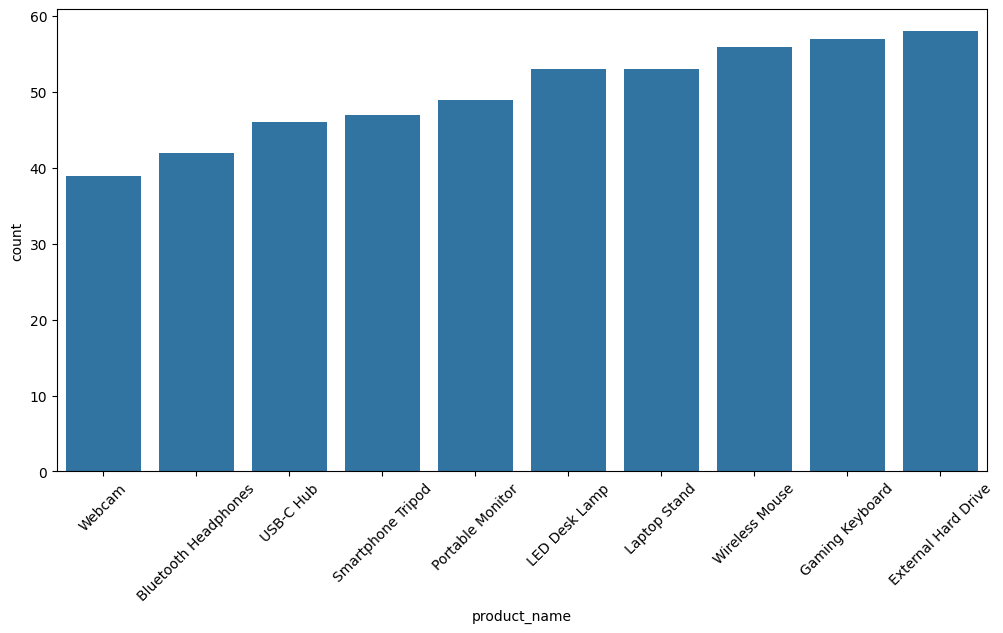

In [10]:
plt.figure(figsize=(12,6))
product_counts = df['product_name'].value_counts().sort_values(ascending=True)
sns.countplot(data=df,x='product_name',order=product_counts.index)
plt.xticks(rotation=45)
plt.show()

<Axes: >

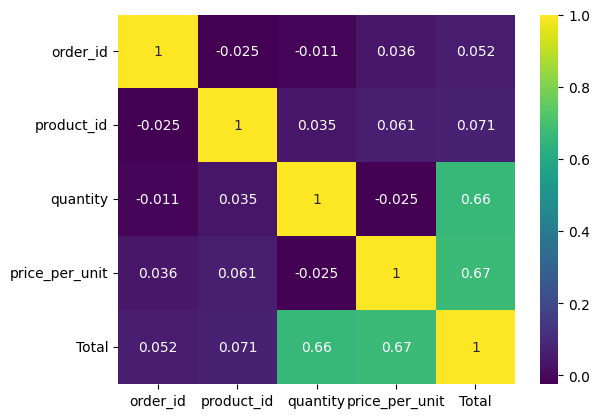

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

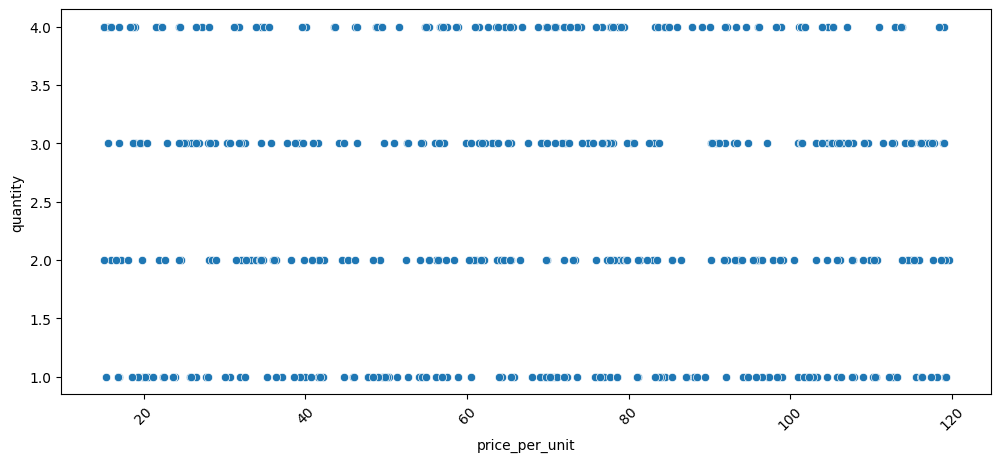

In [12]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x='price_per_unit',y='quantity')
plt.xticks(rotation=45)

In [13]:
df2=pd.read_csv('dataset/house_prices.csv')
df2.head()

,LotArea,YearBuilt,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice
0,12270,2019,10,1197,1273,0,251798
1,5860,1960,10,1839,827,0,200319
2,10390,1965,5,1701,877,2,155668
3,10191,2008,7,1039,2039,2,256814
4,10734,2019,4,1231,2209,1,224834


In [14]:
df.isnull().sum()

order_id          0
product_id        0
product_name      0
quantity          0
price_per_unit    0
order_date        0
Total             0
dtype: int64

<Axes: >

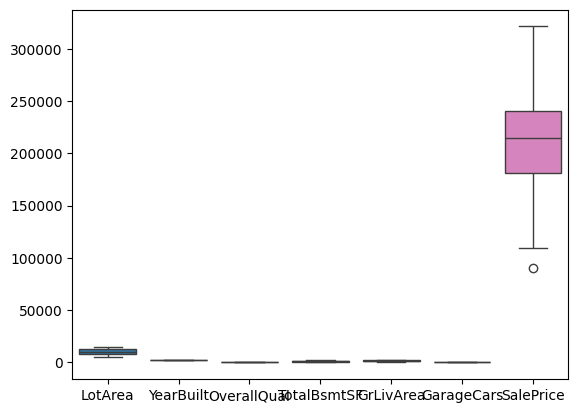

In [15]:
sns.boxplot(data=df2)

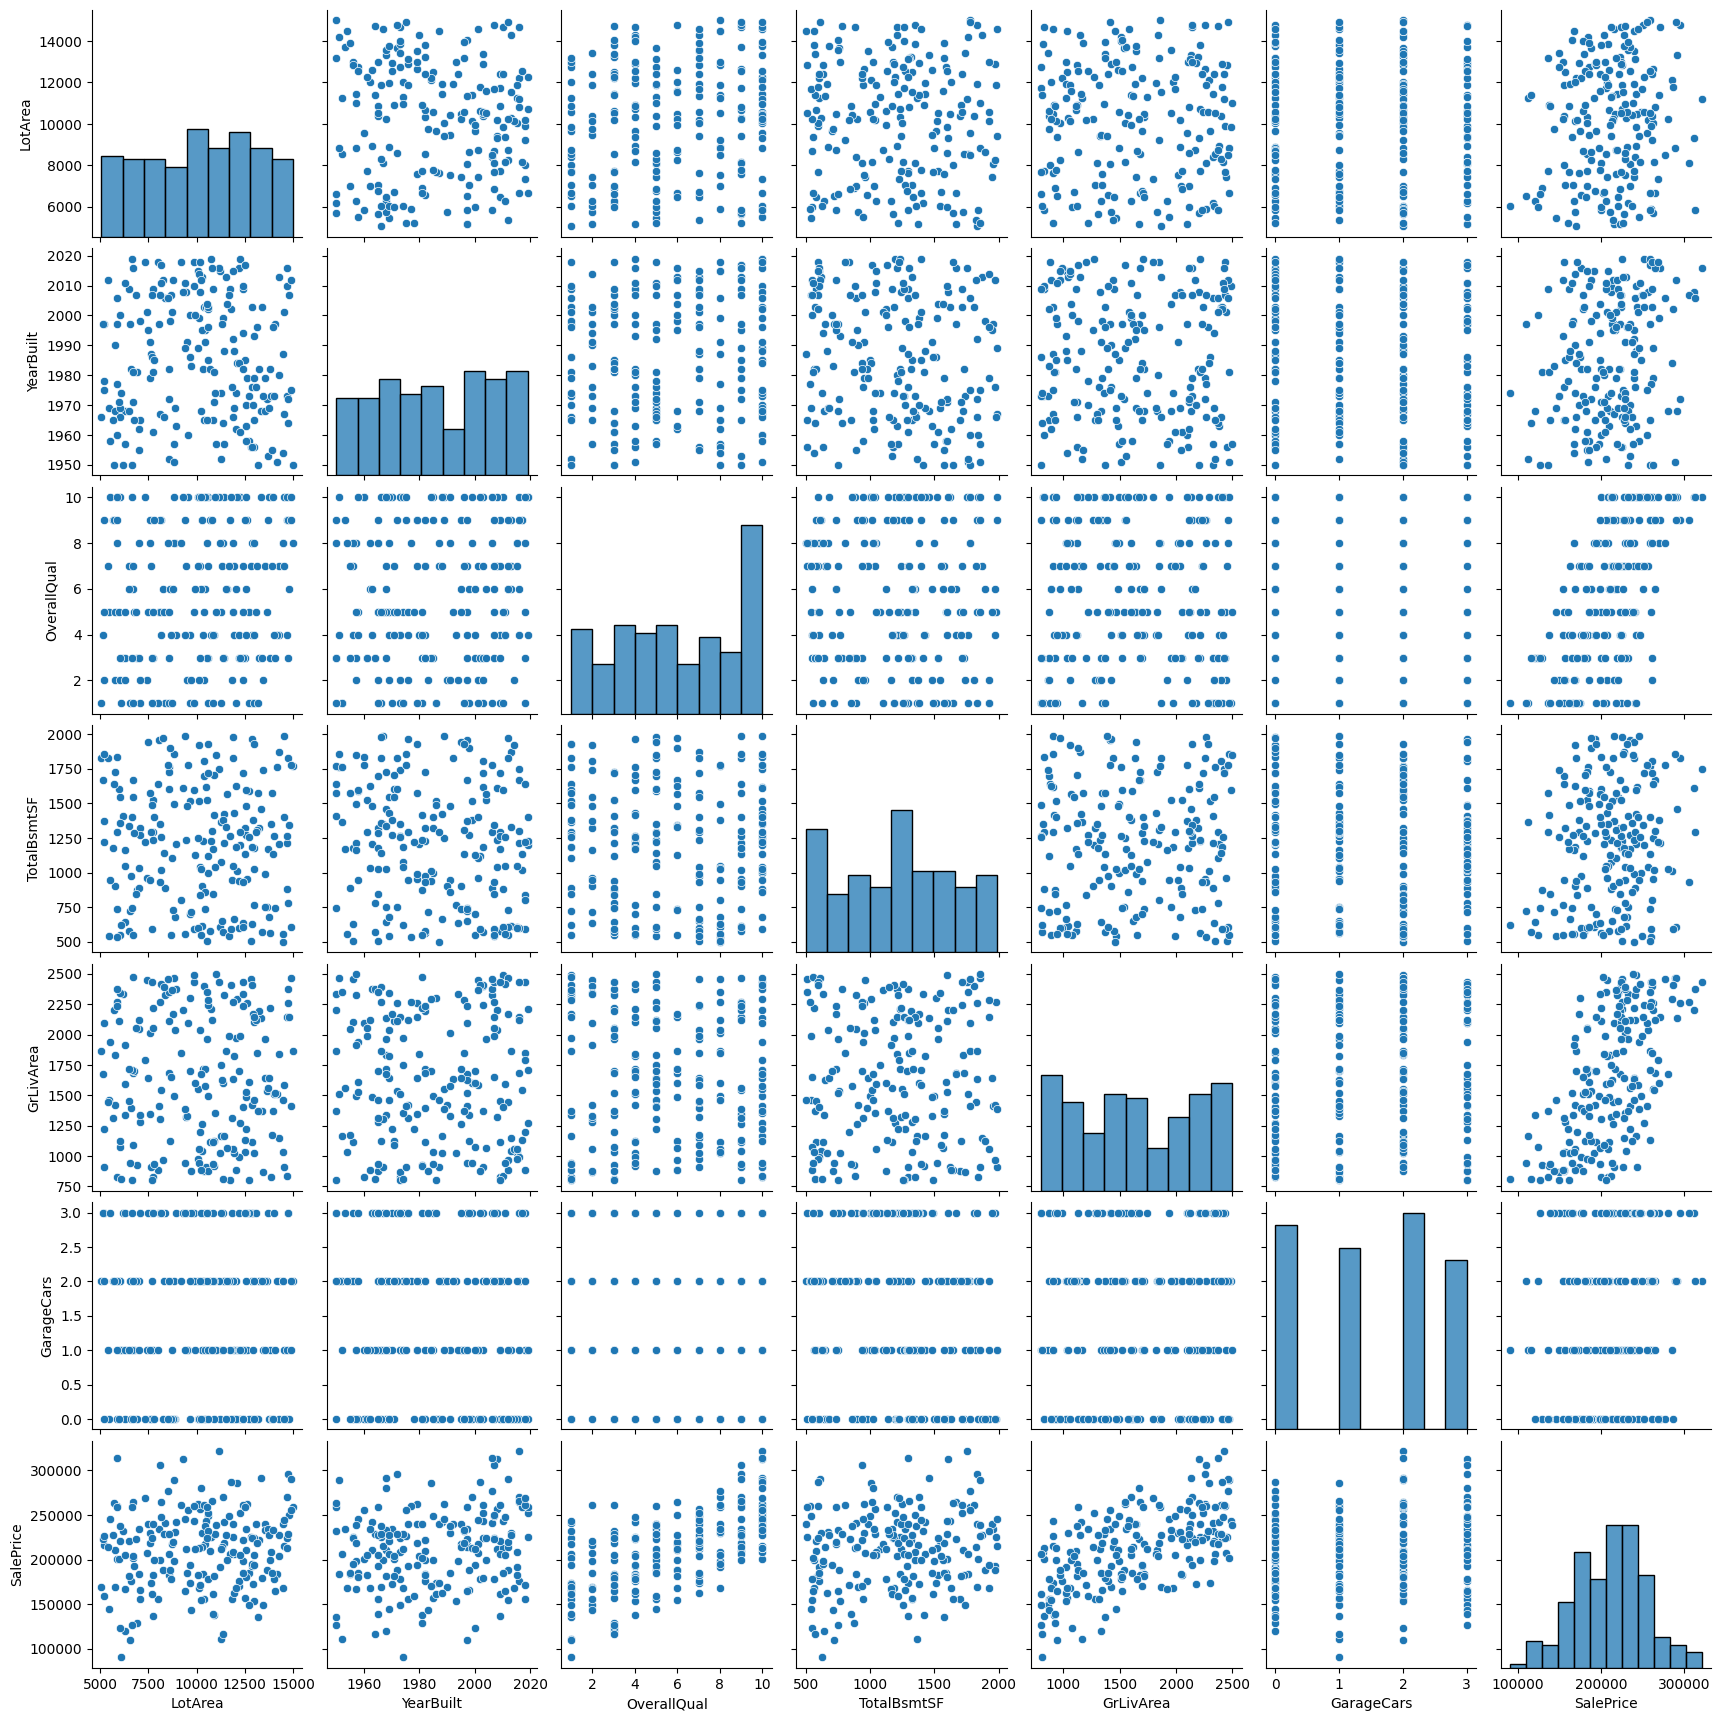

In [16]:
numeric_df=df2.select_dtypes(include='number')
sns.pairplot(data=numeric_df)

In [20]:
outlier_iqr={}
Q1=numeric_df.quantile(0.25)
Q3=numeric_df.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
for col in numeric_df.columns:
    outlier_condition = (numeric_df[col] < lower_bound[col]) | (numeric_df[col] > upper_bound[col])
    outlier_iqr[col] = df2[outlier_condition]  # Store full rows of outliers per column
pd.Series(outlier_iqr)

LotArea        Empty DataFrame
Columns: [LotArea, YearBuilt, ...
YearBuilt      Empty DataFrame
Columns: [LotArea, YearBuilt, ...
OverallQual    Empty DataFrame
Columns: [LotArea, YearBuilt, ...
TotalBsmtSF    Empty DataFrame
Columns: [LotArea, YearBuilt, ...
GrLivArea      Empty DataFrame
Columns: [LotArea, YearBuilt, ...
GarageCars     Empty DataFrame
Columns: [LotArea, YearBuilt, ...
SalePrice           LotArea  YearBuilt  OverallQual  TotalBsm...
dtype: object